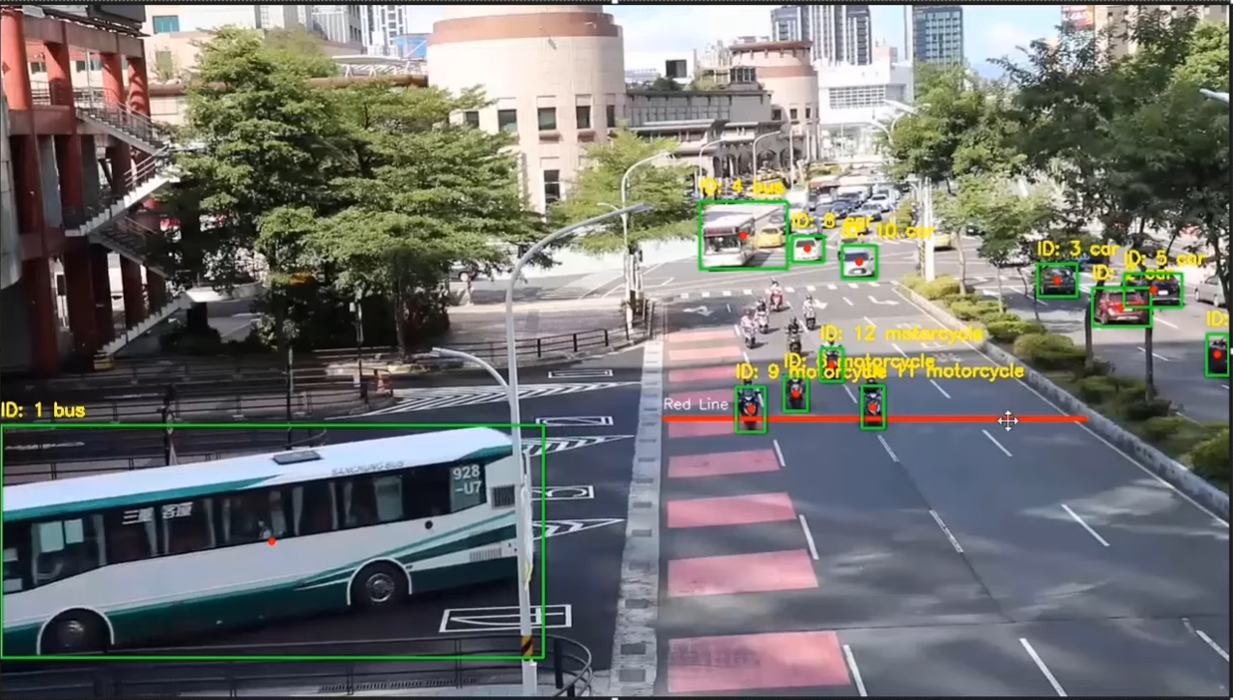

In [1]:
! pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
from ultralytics import YOLO
from collections import defaultdict

model = YOLO("yolo11l.pt") #trained on coco dataset

In [3]:
class_list = model.names
class_list

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [4]:
cap = cv2.VideoCapture('sample_video2.mp4')

# Detection and Tracking

In [5]:
! pip install lap

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import sys
print(sys.executable)


c:\Users\Prakriti\AppData\Local\Programs\Python\Python312\python.exe


In [7]:
import cv2
from ultralytics import YOLO
from collections import defaultdict

# Load the YOLO model
model = YOLO('yolo11l.pt')

class_list = model.names 
#class_list

# Open the video file
cap = cv2.VideoCapture('4.mp4')

line_y_red = 430  # Red line position

# Dictionary to store object counts by class
class_counts = defaultdict(int)

# Dictionary to keep track of object IDs that have crossed the line
crossed_ids = set()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO tracking on the frame
    results = model.track(frame, persist=True, classes = [1,2,3,5,6,7]) 
    #print(results)

    # Ensure results are not empty
    if results[0].boxes.data is not None:
        # Get the detected boxes, their class indices, and track IDs
        boxes = results[0].boxes.xyxy.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()
        class_indices = results[0].boxes.cls.int().cpu().tolist()
        confidences = results[0].boxes.conf.cpu()

        cv2.line(frame, (690, line_y_red), (1130, line_y_red), (0, 0, 255), 3)
        #cv2.putText(frame, 'Red Line', (690, line_y_red - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        # Loop through each detected object
        for box, track_id, class_idx, conf in zip(boxes, track_ids, class_indices, confidences):
            x1, y1, x2, y2 = map(int, box)
            cx = (x1 + x2) // 2  # Calculate the center point
            cy = (y1 + y2) // 2            

            class_name = class_list[class_idx]

            cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
            
            cv2.putText(frame, f"ID: {track_id} {class_name}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) 


            # Check if the object has crossed the red line
            if cy > line_y_red and track_id not in crossed_ids:
                # Mark the object as crossed
                crossed_ids.add(track_id)
                class_counts[class_name] += 1


        # Display the counts on the frame
        y_offset = 30
        for class_name, count in class_counts.items():
            cv2.putText(frame, f"{class_name}: {count}", (50, y_offset),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            y_offset += 30

    
    
    # Show the frame
    cv2.imshow("YOLO Object Tracking & Counting", frame)    
    
    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


0: 384x640 10 cars, 3 motorcycles, 3 buss, 1 truck, 855.8ms
Speed: 11.0ms preprocess, 855.8ms inference, 20.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 3 motorcycles, 3 buss, 1 truck, 835.9ms
Speed: 12.4ms preprocess, 835.9ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 3 motorcycles, 3 buss, 1 truck, 797.7ms
Speed: 7.7ms preprocess, 797.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 3 motorcycles, 3 buss, 1 truck, 696.1ms
Speed: 4.0ms preprocess, 696.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 4 motorcycles, 3 buss, 1 truck, 712.8ms
Speed: 2.8ms preprocess, 712.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 4 motorcycles, 3 buss, 1 truck, 692.8ms
Speed: 2.6ms preprocess, 692.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 4 motorcycles, 3 buss, 